In [1]:
import sys

In [4]:
sys.path.append('/Users/pradap/Documents/Research/Python-Package/pradap/downsample')

In [5]:
import downsample.core.mur_sample

In [27]:
import pandas as pd
import numpy as np
from downsample.core.mur_wrapper_cy import get_str_cols, concat_cols, tokenize_n_rem_stopwords
from downsample.core.mur_wrapper_cy import build_inv_index, sample_pairs

from dask import delayed

def mur_sample(ltable, rtable, sample_size, y_param, stopword_list=[], num_chunks=1):

    ltbl_str_cols = get_str_cols(ltable)


    rtable = rtable.sample(sample_size, replace=False)
    rtbl_str_cols = get_str_cols(rtable)

    ltbl_concat_cols = concat_cols(ltable[ltbl_str_cols])
    rtbl_concat_cols = concat_cols(rtable[rtbl_str_cols])


    ret_tokens = tokenize_n_rem_stopwords(ltbl_concat_cols, rtbl_concat_cols, stopword_list)

    ltokens = ret_tokens[0]
    rtokens = ret_tokens[1]

    inv_index = build_inv_index(ltokens)

    list_indices = range(len(rtokens))


    rtoken_split = np.array_split(rtokens, num_chunks)
    indices_split = np.array_split(list_indices, num_chunks)

    l_ids = set()
    r_ids = set()
    result_list = []
    for i in range(num_chunks):
        result = (delayed)(sample_pairs)(rtoken_split[i], indices_split[i], inv_index, y_param)
        result_list.append(result)

   # l_ids = (delayed)(sorted)(l_ids)
    #r_ids = (delayed)(sorted)(r_ids)

    #ltbl_sampled = (delayed)(ltable.iloc)[l_ids]
    #rtbl_sampled = (delayed)(rtable.iloc)[r_ids]

    #return (ltbl_sampled, rtbl_sampled)
    return result_list

In [14]:
import py_stringsimjoin as ssj

In [8]:
A, B = ssj.load_person_dataset()

In [28]:
result= mur_sample(A, B, 4, 1)

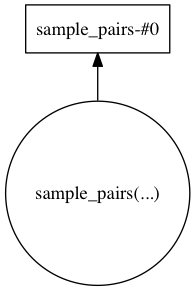

In [30]:
result[0].visualize()